Import libraries

In [114]:
# import libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import cv2
import joblib
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [115]:
# check hardware(add mac gpu support)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# check software
print("Tensorflow version: ", tf.__version__)
print("Pytorch version: ", torch.__version__)

Num GPUs Available:  0
Tensorflow version:  2.15.0
Pytorch version:  2.1.2


In [116]:
# reset when needed
tf.keras.backend.clear_session()
torch.cuda.empty_cache()

In [117]:
# load data
digits = load_digits(n_class=10, as_frame=True)

In [118]:
# dataset info
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Preprocess data

In [119]:
# split data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [120]:
# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Report
print(metrics.classification_report(y_test, y_pred))

# plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

# save the output
# make a directory for output "LogisticRegression"
if not os.path.exists('LogisticRegression'):
    os.makedirs('LogisticRegression')
# save the output
np.savetxt('LogisticRegression/y_pred.csv', y_pred, delimiter=',')
np.savetxt('LogisticRegression/y_test.csv', y_test, delimiter=',')
# save the confusion matrix image
# Get the current figure from Seaborn
fig = plt.gcf()
# save the figure
fig.savefig('LogisticRegression/confusion_matrix.png')

# save confusion matrix data
df_cm = pd.DataFrame(cm)
df_cm.to_csv('LogisticRegression/confusion_matrix.csv')
# save model
joblib.dump(logreg, 'LogisticRegression/logreg_model_sklearn_v1.pkl')
# save terminal output
with open('LogisticRegression/log.txt', 'w') as f:
    f.write("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)) + "\n")
    f.write(metrics.classification_report(y_test, y_pred))

SVM

In [ ]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Report
print(metrics.classification_report(y_test, y_pred))

# plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

# save the output
# make a directory for output "SVM"
if not os.path.exists('SVM'):
    os.makedirs('SVM')
    
# save the output
np.savetxt('SVM/y_pred.csv', y_pred, delimiter=',')
np.savetxt('SVM/y_test.csv', y_test, delimiter=',')
# save the confusion matrix image
# Get the current figure from Seaborn
fig = plt.gcf()
# save the figure
fig.savefig('SVM/confusion_matrix.png')

# save confusion matrix data
df_cm = pd.DataFrame(cm)
df_cm.to_csv('SVM/confusion_matrix.csv')
# save model
joblib.dump(svm, 'SVM/svm_model_sklearn_v1.pkl')
# save terminal output
with open('SVM/log.txt', 'w') as f:
    f.write("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)) + "\n")
    f.write(metrics.classification_report(y_test, y_pred))

Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Report
print(metrics.classification_report(y_test, y_pred))

# plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

# save the output
# make a directory for output "RandomForest"
if not os.path.exists('RandomForest'):
    os.makedirs('RandomForest')
    
# save the output
np.savetxt('RandomForest/y_pred.csv', y_pred, delimiter=',')
np.savetxt('RandomForest/y_test.csv', y_test, delimiter=',')
# save the confusion matrix image
# Get the current figure from Seaborn
fig = plt.gcf()
# save the figure
fig.savefig('RandomForest/confusion_matrix.png')

# save confusion matrix data
df_cm = pd.DataFrame(cm)
df_cm.to_csv('RandomForest/confusion_matrix.csv')
# save model
joblib.dump(rf, 'RandomForest/rf_model_sklearn_v1.pkl')
# save terminal output
with open('RandomForest/log.txt', 'w') as f:
    f.write("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)) + "\n")
    f.write(metrics.classification_report(y_test, y_pred))

KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Report
print(metrics.classification_report(y_test, y_pred))

# plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

# save the output
# make a directory for output "KNN"
if not os.path.exists('KNN'):
    os.makedirs('KNN')
    
# save the output
np.savetxt('KNN/y_pred.csv', y_pred, delimiter=',')
np.savetxt('KNN/y_test.csv', y_test, delimiter=',')
# save the confusion matrix image
# Get the current figure from Seaborn
fig = plt.gcf()
# save the figure
fig.savefig('KNN/confusion_matrix.png')

# save confusion matrix data
df_cm = pd.DataFrame(cm)
df_cm.to_csv('KNN/confusion_matrix.csv')
# save model
joblib.dump(knn, 'KNN/knn_model_sklearn_v1.pkl')
# save terminal output
with open('KNN/log.txt', 'w') as f:
    f.write("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)) + "\n")
    f.write(metrics.classification_report(y_test, y_pred))

reshape data to 1 dimension

In [123]:
# reshape data to 1 dimension
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)

# normalize the data to 0 - 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Kmeans clustering

/Users/raven/PycharmProjects/DL2_Lab/venv_unix/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy:  0.07777777777777778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.33      0.18      0.23        28
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        46
           5       0.23      0.45      0.31        47
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        34
           8       0.13      0.07      0.09        30
           9       0.00      0.00      0.00        40

    accuracy                           0.08       360
   macro avg       0.07      0.07      0.06       360
weighted avg       0.07      0.08      0.07       360


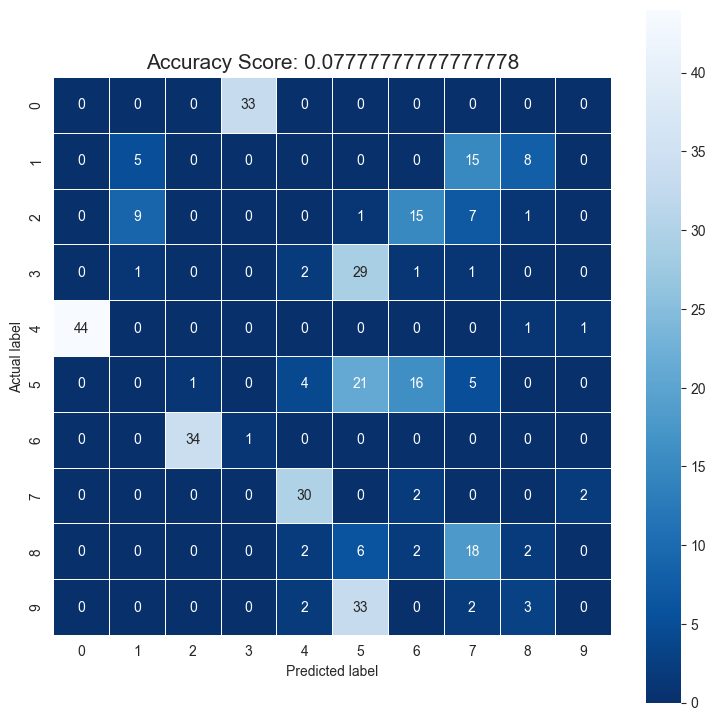

<Figure size 640x480 with 0 Axes>

In [124]:
# Kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Report
print(metrics.classification_report(y_test, y_pred))

# plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()

# save the output
# make a directory for output "Kmeans"
if not os.path.exists('Kmeans'):
    os.makedirs('Kmeans')
    
# save the output
np.savetxt('Kmeans/y_pred.csv', y_pred, delimiter=',')
np.savetxt('Kmeans/y_test.csv', y_test, delimiter=',')
# save the confusion matrix image
# Get the current figure from Seaborn
fig = plt.gcf()
# save the figure
fig.savefig('Kmeans/confusion_matrix.png')

# save confusion matrix data
df_cm = pd.DataFrame(cm)
df_cm.to_csv('Kmeans/confusion_matrix.csv')
# save model
joblib.dump(kmeans, 'Kmeans/kmeans_model_sklearn_v1.pkl')
# save terminal output
with open('Kmeans/log.txt', 'w') as f:
    f.write("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)) + "\n")
    f.write(metrics.classification_report(y_test, y_pred))